# Exploratory Data Analysis – Mercado Global del Café

## 1. Introducción
El café es uno de los productos agrícolas más comercializados a nivel mundial y constituye
una fuente de ingresos clave para numerosos países productores. Sin embargo, el mercado
global del café presenta fuertes diferencias entre países en términos de volumen de
producción y participación en el valor total generado.

El objetivo del EDA es estudiar la distribución de la producción de
café entre los países productores y evaluar si dicha distribución es homogénea o si, por
el contrario, existe una concentración significativa en un número reducido de países.

Para ello, se analizarán datos históricos de producción de café a nivel país, aplicando
técnicas de análisis exploratorio de datos (EDA) que permitan identificar patrones,
desigualdades y niveles de concentración en la producción global.


## Planteamiento del problema

El mercado global del café presenta una elevada relevancia económica para numerosos
países productores. Comprender cómo se distribuye la producción y el valor asociado
al café resulta clave para identificar posibles desequilibrios entre países.


## Objetivos del análisis

El objetivo de este análisis exploratorio es estudiar la distribución de la producción
de café entre países y evaluar si el valor del café se reparte de forma homogénea.


#### Hipótesis  
H1  
✔️ Análisis Univariante  
El valor total del café no se distribuye de forma homogénea entre los países productores.  
➡️ Se verifica comparando valores agregados por país.  
H2
✔️ Análisis Bivariante  
Existe una relación positiva entre el volumen de producción de un país y su volumen de exportación de café..  
➡️ Producción vs exportaciones  
H3
✔️ Análisis Multivariante  
Los países con mayor producción de café no son necesariamente los mayores consumidores internos.  
➡️ producción vs consumo + domestic_consumption  

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df_prod = pd.read_csv("src/data/Coffee_production.csv")
df_domestic = pd.read_csv("src/data/Coffee_domestic_consumption_long.csv")
df_export = pd.read_csv("src/data/Coffee_export.csv")


In [49]:

# 1) Nombres de columnas (evita errores por espacios)
df_prod.columns = df_prod.columns.str.strip()

# 2) Renombrar columnas 
df_prod = df_prod.rename(columns={
    "Country": "Country",
    "Coffee type": "Coffee type",
    "Total_production": "Total_production"
})
df_domestic = df_domestic.rename(columns={
    "País": "Country",
    "Coffee type": "Coffee_type",
    "Total_production ": "Domestic_Consumption"
})

# 3) Identificar las columnas de años
year_cols = [c for c in df_prod.columns if "/" in str(c) and str(c)[:4].isdigit()]

# 4) Pasar a formato largo para facilitar el análisis temporal
df_prod = df_prod.melt(
    id_vars=["Country", "Coffee type"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Production"
)

# 5) Limpiar Year: nos quedamos con el año inicial (1990/91 -> 1990)
df_prod["Year"] = df_prod["Year"].astype(str).str[:4].astype(int)

# 6) Asegurar Production como numérico
df_prod["Production"] = pd.to_numeric(df_prod["Production"], errors="coerce")

# 7) Eliminar nulos de producción 
df_prod_long = df_prod.dropna(subset=["Production"])

# 8) Ordenamos
df_prod = df_prod.sort_values(["Country", "Year"]).reset_index(drop=True)

# 10) Mostrar primeras filas 
display(df_prod.head())
display(df_domestic.head())



,Country,Coffee type,Year,Production
0,Angola,Robusta/Arabica,1990,3000000.0
1,Angola,Robusta/Arabica,1991,4740000.0
2,Angola,Robusta/Arabica,1992,4680000.0
3,Angola,Robusta/Arabica,1993,1980000.0
4,Angola,Robusta/Arabica,1994,4620000.0


,Country,Coffee_type,Domestic_Consumption,Year
0,Angola,Robusta/Arabica,3.000000e+06,1990
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,1990
2,Brazil,Arabica/Robusta,1.637160e+09,1990
3,Burundi,Arabica/Robusta,2.922000e+07,1990
4,Ecuador,Arabica/Robusta,9.024000e+07,1990


## Descripción de los datos

El análisis se basa en un dataset que recoge información anual sobre la producción, consumo y comercio internacional
de café por país, incluyendo el tipo de café y el periodo comprendido entre 1990 y 2019.


### Análisis univariante: Producción

La distribución de la producción de café por país muestra una alta asimetría,
con un número reducido de países concentrando la mayor parte de la producción total.


In [50]:
produccion_pais = (
    df_prod
    .groupby("Country")["Production"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

produccion_pais.head()


,Country,Production
0,Brazil,7.508298e+10
1,Viet Nam,2.880318e+10
2,Colombia,2.159862e+10
3,Indonesia,1.540488e+10
4,Ethiopia,8.669520e+09


### Top 10 Países Productores
#### El ranking de producción muestra que un número reducido de países concentra una parte significativa del volumen total de café producido

In [51]:
top_prod = (
    df_prod
    .groupby("Country")["Production"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [52]:
top_prod / top_prod.sum()*100

Country
Brazil       40.531135
Viet Nam     15.548472
Colombia     11.659321
Indonesia     8.315830
Ethiopia      4.679962
India         4.438501
Mexico        4.239471
Guatemala     3.789813
Honduras      3.602054
Uganda        3.195441
Name: Production, dtype: float64

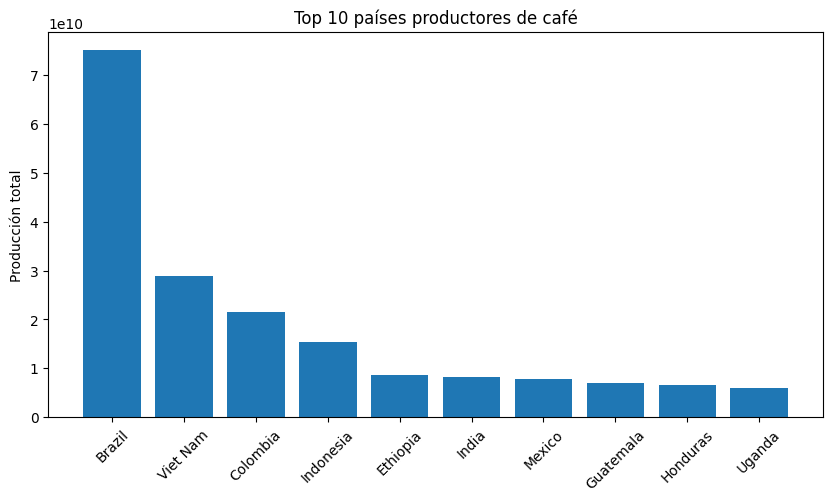

In [53]:
import matplotlib.pyplot as plt

top10 = produccion_pais.head(10)

plt.figure(figsize=(10,5))
plt.bar(top10["Country"], top10["Production"])
plt.xticks(rotation=45)
plt.title("Top 10 países productores de café")
plt.ylabel("Producción total")
plt.show()


El top 10 de países concentra una parte muy significativa de la producción total,
lo que refuerza la hipótesis de una distribución no homogénea.


#### Distribución global de la producción
##### La distribución presenta una fuerte asimetría positiva, indicando que la mayoría de países produce volúmenes reducidos frente a unos pocos grandes productores.

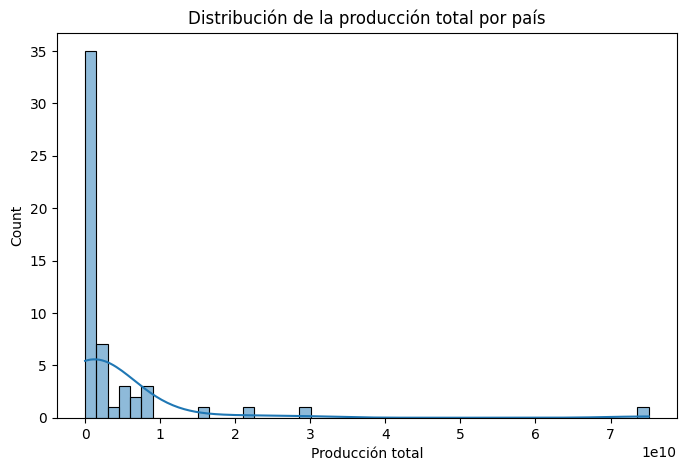

In [54]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(produccion_pais["Production"], bins=50, kde=True)
plt.title("Distribución de la producción total por país")
plt.xlabel("Producción total")
plt.show()


#### Porcentaje acumulado (curva de concentración)
##### Se observa que un pequeño número de países concentra un porcentaje elevado de la producción total, lo que evidencia una distribución no homogénea.



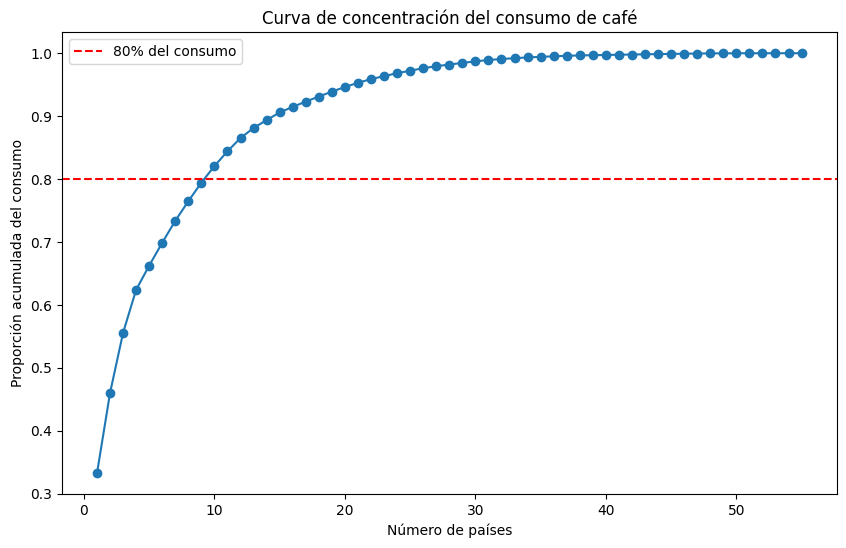

In [55]:
produccion_pais["Share"] = produccion_pais["Production"] / produccion_pais["Production"].sum()
produccion_pais["Cumulative_share"] = produccion_pais["Share"].cumsum()
produccion_pais["Rank"] = range(1, len(produccion_pais) + 1)

plt.figure(figsize=(10,6))
plt.plot(produccion_pais["Rank"], produccion_pais["Cumulative_share"], marker="o")
plt.axhline(0.8, color="red", linestyle="--", label="80% del consumo")
plt.title("Curva de concentración del consumo de café")
plt.xlabel("Número de países")
plt.ylabel("Proporción acumulada del consumo")
plt.legend()
plt.show()


In [56]:
produccion_pais.columns

Index(['Country', 'Production', 'Share', 'Cumulative_share', 'Rank'], dtype='object')

In [57]:
top5_share = produccion_pais.head(5)["Share"].sum()
top10_share = produccion_pais.head(10)["Share"].sum()

top5_share, top10_share


(np.float64(0.6625436873230279), np.float64(0.8206428232915065))

Top 5 países → ~66.3% de la producción mundial

Top 10 países → ~82.1% de la producción mundial

#### Coeficiente de variación
##### CV 2.71 → alta desigualdad  
CV < 0.5	Distribución bastante homogénea  
0.5 ≤ CV < 1	Dispersión moderada  
CV ≥ 1	Alta desigualdad / concentración  


In [58]:
# Calculamos el cv (coeficiente de Variación) mide cuanta desigualdad se reparte la produccion
cv = produccion_pais["Production"].std() / produccion_pais["Production"].mean()
cv


np.float64(2.7107128529813265)

El coeficiente de variación de la producción total por país presenta un valor elevado, lo que indica una alta dispersión relativa. Este resultado refuerza la existencia de una distribución desigual de la producción de café entre los países productores.

### Conclusión de la hipótesis H1

Los resultados obtenidos confirman que la producción de café no se distribuye
de forma homogénea entre los países productores, ya que un reducido grupo de países
concentra la mayor parte del volumen total producido.


Esto significa que:  

Solo 5 países producen casi dos tercios del café del mundo,
y solo 10 países producen más del 80%.  
Los cinco principales países productores concentran aproximadamente el 63% de la producción total, confirmando una elevada concentración del mercado.

Los resultados obtenidos en este análisis se utilizan posteriormente en la memoria
del proyecto para validar la hipótesis H1.


### CONSUMO 

#### El consumo también está concentrado en pocos países → desigualdad en la demanda.

In [59]:
consumo_pais = (
    df_domestic
    .groupby("Country")["Domestic_Consumption"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

consumo_pais.head()

,Country,Domestic_Consumption
0,Brazil,7.508298e+10
1,Viet Nam,2.880318e+10
2,Colombia,2.159862e+10
3,Indonesia,1.540488e+10
4,Ethiopia,8.669520e+09


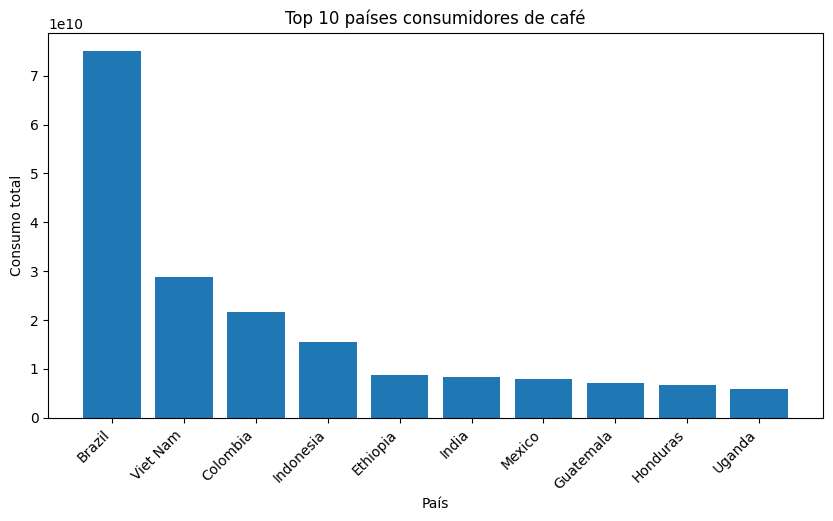

In [60]:
import matplotlib.pyplot as plt

top10_consumo = consumo_pais.head(10)

plt.figure(figsize=(10,5))
plt.bar(top10_consumo["Country"], top10_consumo["Domestic_Consumption"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 países consumidores de café")
plt.ylabel("Consumo total")
plt.xlabel("País")
plt.show()


### EXPORTACIONES

In [61]:
exportaciones_pais = (
    df_export
    .groupby("Country")["Total_export"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

exportaciones_pais.head()


,Country,Total_export
0,Brazil,33807709056
1,Viet Nam,24924480000
2,Colombia,19878480000
3,Indonesia,10607940000
4,India,6933960000


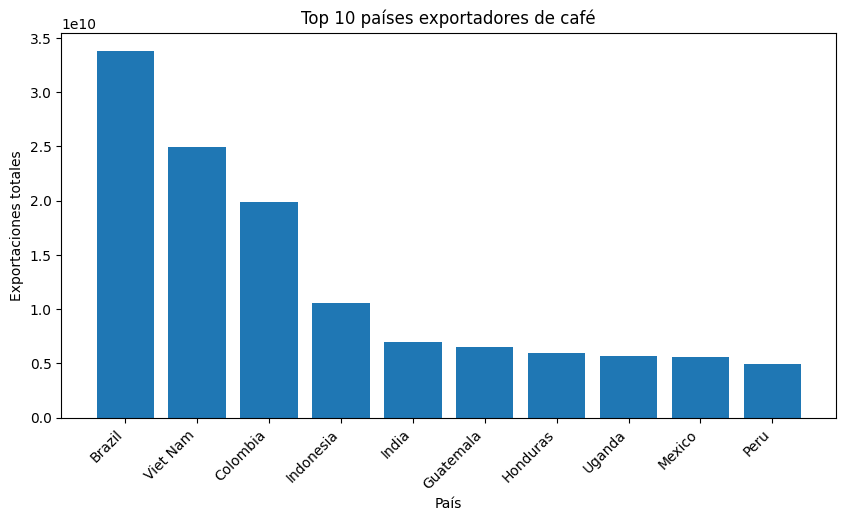

In [62]:
top10_export = exportaciones_pais.head(10)

plt.figure(figsize=(10,5))
plt.bar(top10_export["Country"], top10_export["Total_export"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 países exportadores de café")
plt.ylabel("Exportaciones totales")
plt.xlabel("País")
plt.show()


El análisis del consumo y de las exportaciones muestra patrones de concentración
similares a los observados en la producción. En ambos casos, un número reducido
de países concentra una proporción significativa del total, reforzando la
existencia de una distribución no homogénea del valor del café.

### ANÁLISIS BIVARIANTE: Producción vs Exportación

In [63]:
prod_exp = produccion_pais.merge(
    exportaciones_pais,
    on="Country",
    how="inner"
)

prod_exp.head()


,Country,Production,Share,Cumulative_share,Rank,Total_export
0,Brazil,7.508298e+10,0.332616,0.332616,1,33807709056
1,Viet Nam,2.880318e+10,0.127597,0.460213,2,24924480000
2,Colombia,2.159862e+10,0.095681,0.555895,3,19878480000
3,Indonesia,1.540488e+10,0.068243,0.624138,4,10607940000
4,Ethiopia,8.669520e+09,0.038406,0.662544,5,4163340000


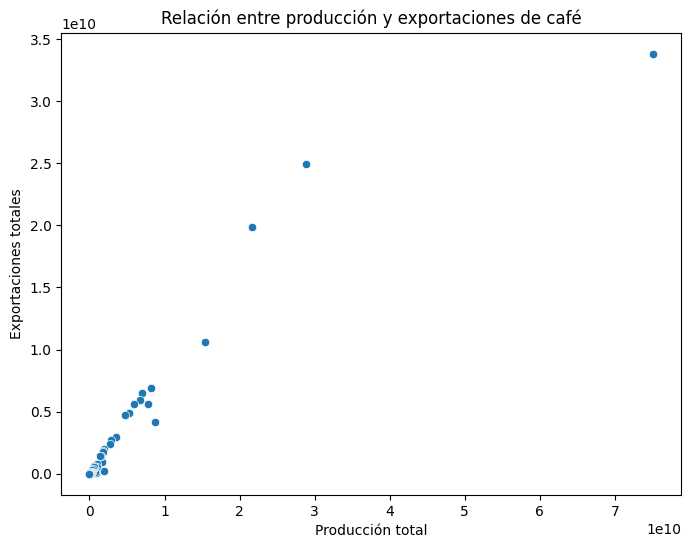

In [64]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=prod_exp,
    x="Production",
    y="Total_export"
)
plt.title("Relación entre producción y exportaciones de café")
plt.xlabel("Producción total")
plt.ylabel("Exportaciones totales")
plt.show()


## Coeficiente de Correlación  
* 0.94  indica una correlación positiva muy fuerte, lo que indica que:  
* los países que producen más café tienden a exportar mucho más café 

In [65]:
corr = prod_exp["Production"].corr(prod_exp["Total_export"])*100
corr


np.float64(94.48968652026637)

### Conclusión de la hipótesis H2

El gráfico muestra una relación positiva/ascendente entre la producción total de café y las exportaciones. En general, los países con mayor producción tienden a exportar mayores volúmenes, aunque existen diferencias significativas entre países. Sin embargo, la presencia de outliers muestra que el mercado está dominado por un reducido número de países con volúmenes excepcionalmente altos, mientras que la mayoría presenta niveles mucho más bajos.

También es verdad que el valor puede estar influido por outliers (grandes productores/exportadores).

Países con volúmenes extremadamente altos empujan la correlación hacia arriba.  

para tener la visión completa de este análisis, vamos a utilizar la escala logaritmica y una correlación sin outliers



## Escala Logarítmica  
. Reduce el efecto de los outliers.

. Permite ver mejor a países pequeños y medianos.

. Mantiene la relación entre variables.

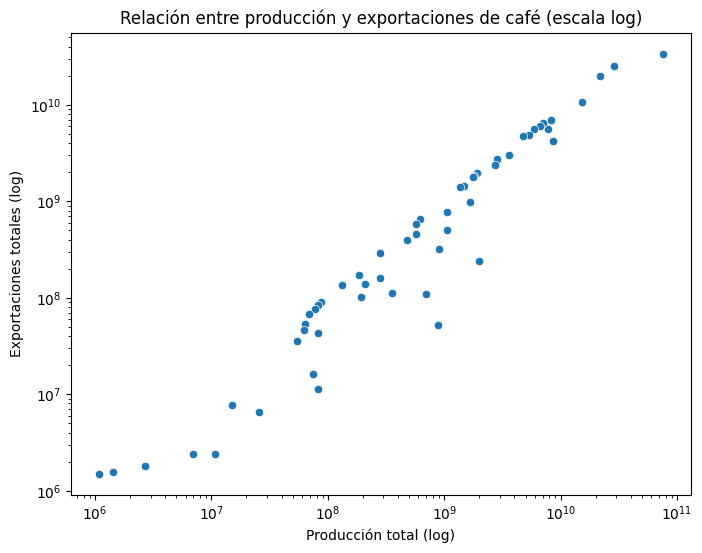

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=prod_exp,
    x="Production",
    y="Total_export"
)
plt.xscale("log")
plt.yscale("log")

plt.title("Relación entre producción y exportaciones de café (escala log)")
plt.xlabel("Producción total (log)")
plt.ylabel("Exportaciones totales (log)")
plt.show()


Al utilizar una escala logarítmica se reduce la influencia de los valores extremos, permitiendo observar con mayor claridad la relación entre producción y exportaciones para la mayoría de los países.

### ANÁLISIS MULTIVARIANTE : Producción, Consumo y Exportaciones
Los países con mayor producción de café tienden a presentar mayores niveles de exportación y un consumo doméstico relativamente menor, lo que indica una orientación del valor del café hacia el mercado internacional.


In [67]:
produccion_pais = (
    df_prod
    .groupby("Country")["Production"]
    .sum()
    .reset_index()
)


In [68]:
consumo_pais = (
    df_domestic
    .groupby("Country")["Domestic_Consumption"]
    .sum()
    .reset_index()
)


In [69]:
exportaciones_pais = (
    df_export
    .groupby("Country")["Total_export"]
    .sum()
    .reset_index()
)


In [70]:
df_multi = (
    produccion_pais
    .merge(consumo_pais, on="Country", how="inner")
    .merge(exportaciones_pais, on="Country", how="inner")
)

df_multi.head()


,Country,Production,Domestic_Consumption,Total_export
0,Angola,8.208000e+07,8.208000e+07,43320000
1,Bolivia (Plurinational State of),2.070000e+08,2.070000e+08,137460000
2,Brazil,7.508298e+10,7.508298e+10,33807709056
3,Burundi,6.236400e+08,6.236400e+08,646200000
4,Cameroon,1.358640e+09,1.358640e+09,1399920000


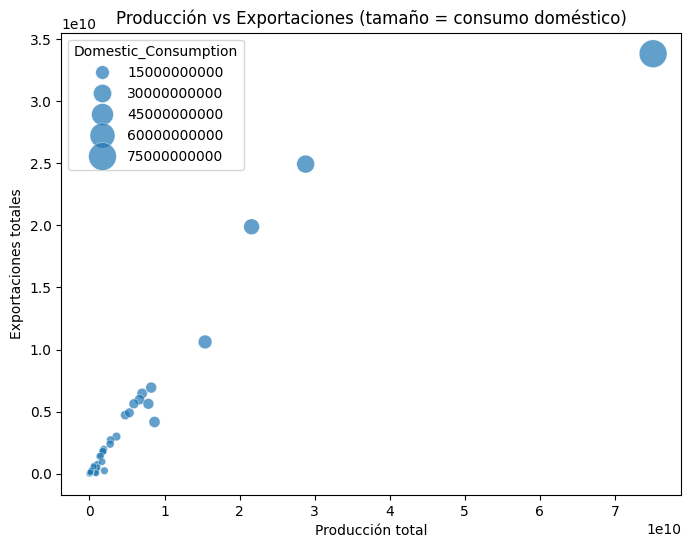

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_multi,
    x="Production",
    y="Total_export",
    size="Domestic_Consumption",
    sizes=(20, 400),
    alpha=0.7
)

plt.title("Producción vs Exportaciones (tamaño = consumo doméstico)")
plt.xlabel("Producción total")
plt.ylabel("Exportaciones totales")
plt.show()


### Conclusión de la hipótesis H3

Para analizar la orientación del valor del café hacia el mercado internacional,
se realizó un análisis multivariante a nivel país considerando producción,
consumo doméstico y exportaciones.  
Los resultados muestran que los países con
mayores niveles de producción tienden a concentrar también mayores volúmenes de
exportación, mientras que su consumo interno es relativamente menor en comparación
con su producción total. Este patrón sugiere una clara orientación exportadora en
los principales países productores.


Los resultados de este análisis se utilizan posteriormente en la memoria del proyecto
para la validación de las hipótesis planteadas.


## Limitaciones del análisis

El análisis se basa en datos agregados a nivel país, lo que impide capturar
diferencias internas o regionales. No se consideran variables como precios
internacionales o costes de producción.
